In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for data pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler # standard score aka z score
from sklearn.preprocessing import LabelEncoder #Encode target labels with value between 0 and n_classes-1.
from sklearn.preprocessing import LabelBinarizer

plt.style.use('ggplot')

#Libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#For Decision Tree implementation
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#For KNN implementation
from sklearn.neighbors import KNeighborsClassifier

#For Bagging implementation
from sklearn.ensemble import BaggingClassifier

#For AdaBoost implementation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib
import warnings
#import xgboost as xgb
#import lightgbm as lgb
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn import metrics
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
df = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
df['month']=pd.to_datetime(df['month'])
df['month'].head()
df['Year'] = df['month'].apply(lambda x: x.year)
df['Month'] = df['month'].apply(lambda y: y.month)
df = df[df['Year'] == 2019]
df['years_left'] = df['Year'] - df['lease_commence_date']
df = df.drop(columns = ['month','block','lease_commence_date','Month','Year','remaining_lease'])

In [3]:
# Randomly sample 5 records with .sample(5)
df.sample(5)

,town,flat_type,street_name,storey_range,floor_area_sqm,flat_model,resale_price,years_left
48708,BUKIT BATOK,3 ROOM,BT BATOK EAST AVE 4,07 TO 09,64.0,Simplified,235000.0,33
56339,YISHUN,4 ROOM,YISHUN AVE 11,16 TO 18,92.0,DBSS,545000.0,6
42432,CENTRAL AREA,3 ROOM,SELEGIE RD,04 TO 06,56.0,Standard,340000.0,45
59325,JURONG WEST,EXECUTIVE,JURONG WEST ST 42,04 TO 06,150.0,Maisonette,507000.0,34
45650,JURONG EAST,EXECUTIVE,JURONG EAST ST 21,04 TO 06,144.0,Apartment,739000.0,21


In [4]:
# Check the columns using dtypes
print(df.dtypes)

town               object
flat_type          object
street_name        object
storey_range       object
floor_area_sqm    float64
flat_model         object
resale_price      float64
years_left          int64
dtype: object


# 2. Baseline Model (Decision Tree)
A simple/initial model that you compare your later/more complex models against. It is basically the benchmark for your problem statement.

#### Label Encoder for ordinal data columns

In [5]:
#technically town, flat_type, streets_name and flat_model have a "tier" of sort, some town are better areas to live,
#some flat_type are better,
for column in df.columns:
    if (df[column].dtype == type(object)) and (column != 'flat_type'):
        #Create the label encoder
        le = preprocessing.LabelEncoder()
        #Convert the non numeric data to numeric
        df[column] = le.fit_transform(df[column])

In [6]:
# Randomly sample 5 records with .sample(5)
df.sample(5)

,town,flat_type,street_name,storey_range,floor_area_sqm,flat_model,resale_price,years_left
62933,8,EXECUTIVE,121,2,145.0,1,471000.0,24
58964,10,3 ROOM,127,0,52.0,15,200000.0,48
53776,19,4 ROOM,0,4,95.0,11,368000.0,18
61637,19,5 ROOM,1,5,110.0,3,370000.0,15
42930,17,4 ROOM,336,5,94.0,11,498888.0,9


#### One Hot Encoder for nominal data columns

In [7]:
# #OneHotEncoder categorical nominal data column "town","flat_type","street_name","flat_model","Day of Week"
# cols = ["town","street_name","flat_model"]
# for i in cols:
#     labelbinarizer = LabelBinarizer()
#     x = labelbinarizer.fit_transform(df[i])
#     encoded_df = pd.DataFrame(x, columns=labelbinarizer.classes_)
#     df = pd.concat([df, encoded_df], axis=1)

### Building Decision Tree Model

In [8]:
df['flat_type'].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM', '2 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [9]:
#split dataset in features and target variable
feature_cols = ['town','street_name','storey_range','floor_area_sqm','flat_model','years_left','resale_price']
X = df[feature_cols]
#y = df[['flat_type']]
y = df['flat_type']

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1) # 50% training and 50% test

In [11]:
# initialise Decision Tree
#Using gini currently, can also use entropy or miclassification error.
clf = DecisionTreeClassifier(criterion='gini',random_state=0) 

# train model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [12]:
# get predictions and compare results
predictions = clf.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(100)

,Actual,Predicted
57591,4 ROOM,4 ROOM
51280,5 ROOM,5 ROOM
64056,EXECUTIVE,EXECUTIVE
60927,2 ROOM,2 ROOM
57605,5 ROOM,5 ROOM
...,...,...
43574,4 ROOM,4 ROOM
58176,3 ROOM,3 ROOM
43173,5 ROOM,5 ROOM
43936,4 ROOM,4 ROOM


In [13]:
# Accuracy
asr_dt = accuracy_score(y_test,predictions)
print("Accuracy:",asr_dt)

Accuracy: 0.9964842693590552


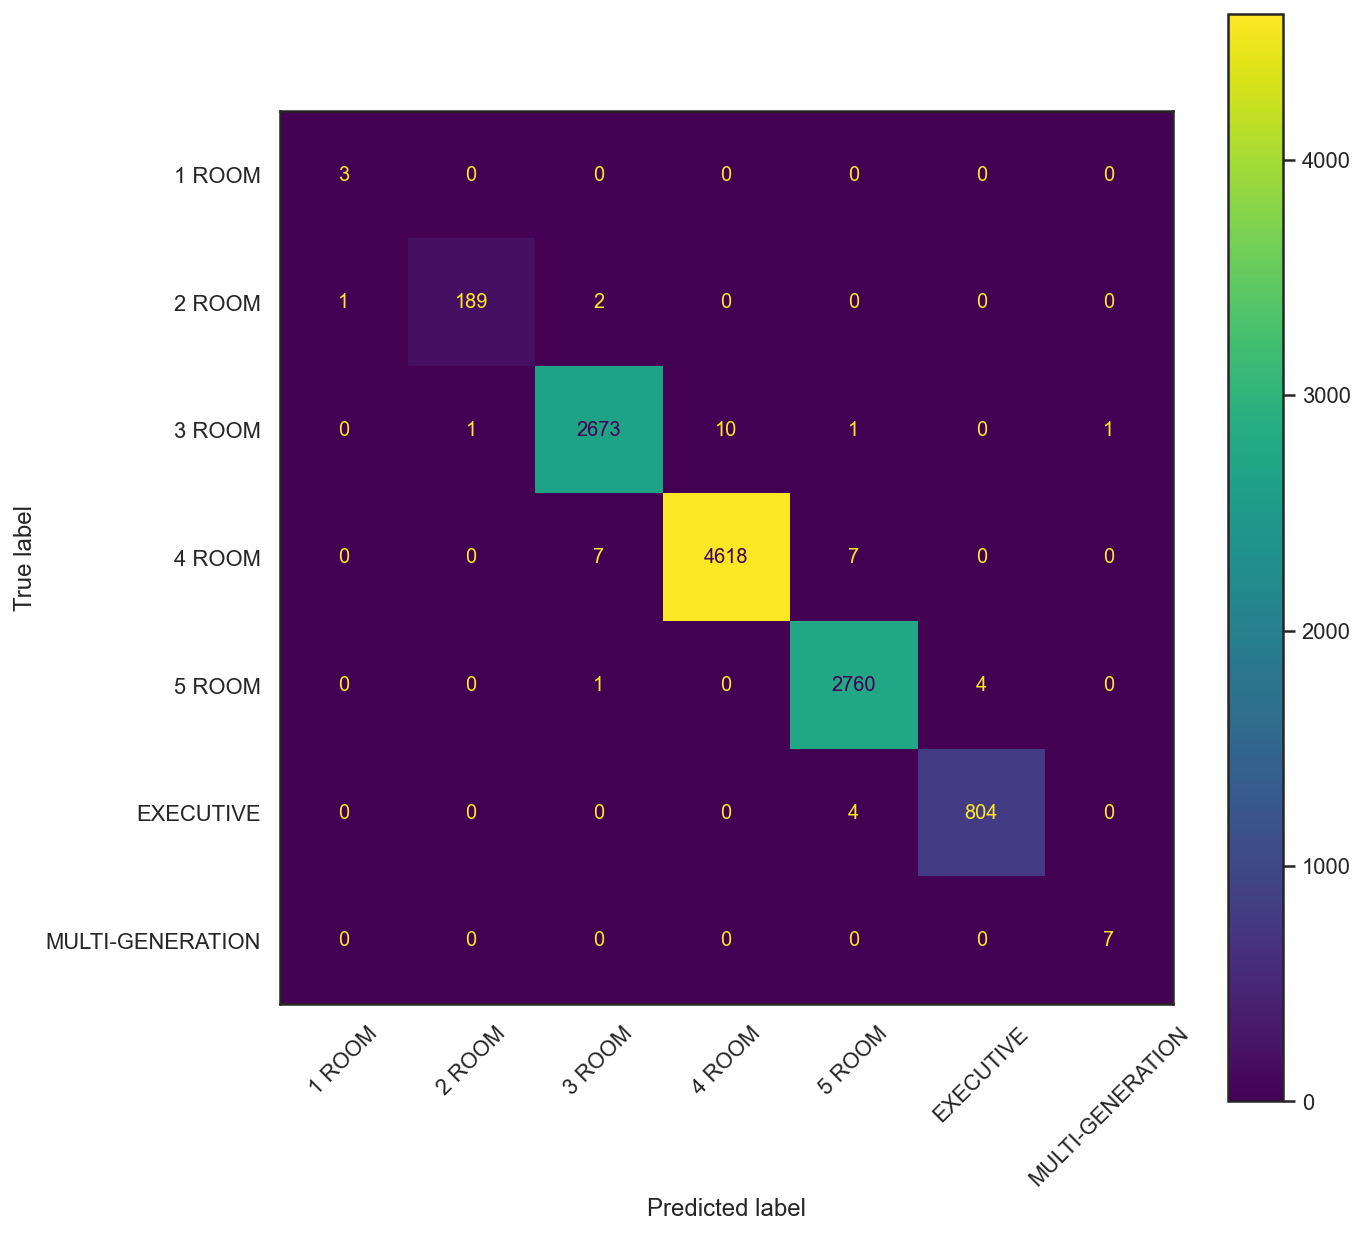

In [14]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(clf, X_test, y_test, ax=ax, xticks_rotation = 45);

In [15]:
# Precision = (True Positive)/(Total Predicted Positive)
# To determine if costs of False Positive is high.
precision = metrics.precision_score(y_test, predictions, average='micro')
precision1 = metrics.precision_score(y_test, predictions, average='macro')
precision2 = metrics.precision_score(y_test, predictions, average='weighted')

#Recall = (True Positive)/(Total Actual Positive)
# calculates the no. of Actual Positives our model capture through labeling it as Positive
recall = metrics.recall_score(y_test, predictions, average='micro')
recall1 = metrics.recall_score(y_test, predictions, average='macro')
recall2 = metrics.recall_score(y_test, predictions, average='weighted')

#F1-score = 2* (precision*recall)/(precision + recall)
# F1 Score is needed when you want to seek a balance between Precision and Recall.
f_measure = metrics.f1_score(y_test, predictions, average='micro')
f_measure1 = metrics.f1_score(y_test, predictions, average='macro')
f_measure2 = metrics.f1_score(y_test, predictions, average='weighted')

# https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

# Accuracy
asr_dt = accuracy_score(y_test,predictions)
print("Accuracy:",asr_dt)

print("Precision_micro:",precision)
print("Recall_micro:",recall)
print("F-measure_micro:",f_measure)

print("Precision1_macro:",precision1)
print("Recall1_macro:",recall1)
print("F-measure1_macro:",f_measure1)

print("Precision2_weighted:",precision2)
print("Recall2_weighted:",recall2)
print("F-measure2_weighted:",f_measure2)

Accuracy: 0.9964842693590552
Precision_micro: 0.9964842693590552
Recall_micro: 0.9964842693590552
F-measure_micro: 0.9964842693590552
Precision1_macro: 0.943509915865982
Recall1_macro: 0.9956791176477656
F-measure1_macro: 0.966444084598515
Precision2_weighted: 0.996518070148646
Recall2_weighted: 0.9964842693590552
F-measure2_weighted: 0.9964926915378098


In [16]:
###################################################################################################################################


In [17]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)


In [18]:
#Create the kNN classifier and set the number of neighbors to be 3. Note that you can tune this number of neighbors
model = KNeighborsClassifier(n_neighbors=3)

#Fit the training feature Xs and training label Ys
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred = model.predict(X_test)

In [20]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr_knn = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out different scores.
f2 = precision_score(y_pred, y_test,average='micro')
f3 = recall_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('accuracy: ',asr_knn)
print('f1-Score: ',f1)
print('precision: ',f2)
print('recall: ',f3)

[[   2    3    2    0    0    0    0]
 [   0   81   80    8    1    0    0]
 [   1  103 2062  340   59   11    0]
 [   0    5  510 3595  855  165    1]
 [   0    0   29  610 1655  305    6]
 [   0    0    3   79  195  327    0]
 [   0    0    0    0    0    0    0]]
accuracy:  0.6961146669070585
f1-Score:  0.6961146669070585
precision:  0.6961146669070585
recall:  0.6961146669070585


## Bagging (with Decision Tree)

Refer to the following links on for detail explanation on the implementation:

In [21]:
#Create the Bagging classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
model = BaggingClassifier(n_estimators=50)

#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

BaggingClassifier(n_estimators=50)

In [22]:
#Use the trained model to predict the test data
y_pred = model.predict(X_test)

In [23]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr_bag = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')
f1_macro = f1_score(y_pred, y_test,average='macro')
f1_weighted = f1_score(y_pred, y_test,average='weighted')


# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')
f2 = precision_score(y_pred, y_test,average='micro')
f2_macro = precision_score(y_pred, y_test,average='macro')
f2_weighted = precision_score(y_pred, y_test,average='weighted')

f3 = recall_score(y_pred, y_test,average='micro')
f3_macro = recall_score(y_pred, y_test,average='macro')
f3_weighted = recall_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('Accuracy: ',asr_bag)
print('F1-Score_micro: ',f1)
print('precision_micro: ',f2)
print('recall_micro: ',f3)
print('F1-Score_maro: ',f1_macro)
print('precision_macro: ',f2_macro)
print('recall_macro: ',f3_macro)
print('F1-Score_weighted: ',f1_weighted)
print('precision_weighted: ',f2_weighted)
print('recall_weighted: ',f3_weighted)

[[   3    1    0    0    0    0    0]
 [   0  189    0    0    0    0    0]
 [   0    2 2673    2    1    0    0]
 [   0    0   11 4627    0    0    0]
 [   0    0    1    3 2762    2    0]
 [   0    0    0    0    2  806    0]
 [   0    0    1    0    0    0    7]]
Accuracy:  0.9976561795727035
F1-Score_micro:  0.9976561795727035
precision_micro:  0.9976561795727035
recall_micro:  0.9976561795727035
F1-Score_maro:  0.9676312315215183
precision_macro:  0.9964136290780093
recall_macro:  0.9451597636426827
F1-Score_weighted:  0.997648323630948
precision_weighted:  0.9976630183564743
recall_weighted:  0.9976561795727035


In [24]:
# get predictions and compare results
predictions = model.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10)

,Actual,Predicted
55893,3 ROOM,3 ROOM
44884,4 ROOM,4 ROOM
61743,4 ROOM,4 ROOM
59835,5 ROOM,5 ROOM
60335,3 ROOM,3 ROOM
62003,5 ROOM,5 ROOM
62262,3 ROOM,3 ROOM
60268,5 ROOM,5 ROOM
43635,3 ROOM,3 ROOM
44441,3 ROOM,3 ROOM


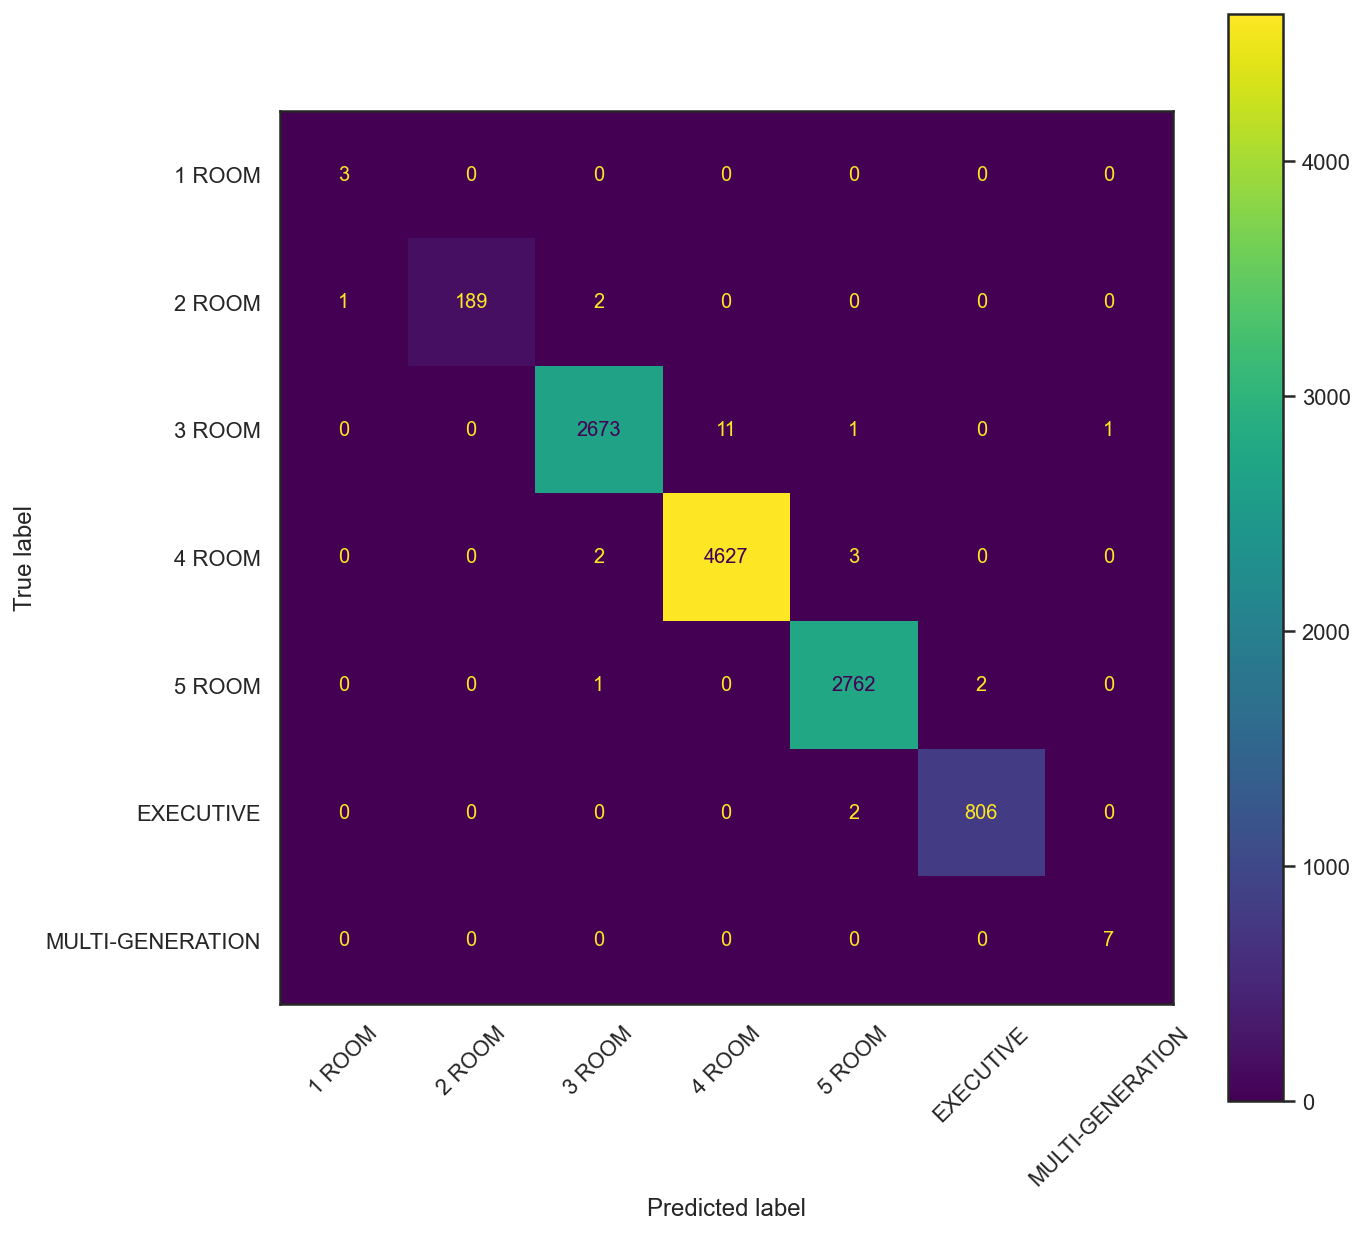

In [25]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(model, X_test, y_test, ax=ax, xticks_rotation = 45);

## Bagging (with kNN)

In [26]:
#Create the kNN base classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Create the Bagging classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
model = BaggingClassifier(n_estimators=50, base_estimator=knn)

#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50)

In [27]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
bag_knn = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')
f2 = precision_score(y_pred, y_test,pos_label='positive',average='micro')
f3 = recall_score(y_pred, y_test,pos_label='positive',average='micro')
#The best f1_score is 1 and the worst value is 0.

print('accuracy: ',bag_knn)
print('f1-Score: ',f1)
print('precision: ',f2)
print('recall: ',f3)

[[   3    1    0    0    0    0    0]
 [   0  189    0    0    0    0    0]
 [   0    2 2673    2    1    0    0]
 [   0    0   11 4627    0    0    0]
 [   0    0    1    3 2762    2    0]
 [   0    0    0    0    2  806    0]
 [   0    0    1    0    0    0    7]]
accuracy:  0.9976561795727035
f1-Score:  0.9976561795727035
precision:  0.9976561795727035
recall:  0.9976561795727035


## AdaBoost (with Decision Tree)


In [28]:
#Create the AdaBoost classifier. Default base classifiers is Decision Tree. 
# - n_estimator is the number of base classifiers (i.e. weak learners)
# - learning_rate controls the weight adjustments of each base classifiers. Default is 1
modelA = AdaBoostClassifier(n_estimators=50,learning_rate=0.1)

#Fit the training feature Xs and training label Ys
modelA.fit(X_train, y_train)

#Use the trained modelA to predict the test data
y_pred = modelA.predict(X_test)

In [29]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
# Find the accuracy and F1 score of the result
asr_ada = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')
f1_macro = f1_score(y_pred, y_test,average='macro')
f1_weighted = f1_score(y_pred, y_test,average='weighted')


# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# f2 = f1_score(y_pred, y_test,average='macro')
# f3 = f1_score(y_pred, y_test,average='weighted')
f2 = precision_score(y_pred, y_test,average='micro')
f2_macro = precision_score(y_pred, y_test,average='macro')
f2_weighted = precision_score(y_pred, y_test,average='weighted')

f3 = recall_score(y_pred, y_test,average='micro')
f3_macro = recall_score(y_pred, y_test,average='macro')
f3_weighted = recall_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('Accuracy: ',asr_ada)
print('F1-Score_micro: ',f1)
print('precision_micro: ',f2)
print('recall_micro: ',f3)
print('F1-Score_maro: ',f1_macro)
print('precision_macro: ',f2_macro)
print('recall_macro: ',f3_macro)
print('F1-Score_weighted: ',f1_weighted)
print('precision_weighted: ',f2_weighted)
print('recall_weighted: ',f3_weighted)

[[   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   3  192  769    3    0    0    0]
 [   0    0 1915 4545   26    0    0]
 [   0    0    2   84 2739  808    7]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]]
Accuracy:  0.7259533038853331
F1-Score_micro:  0.7259533038853332
precision_micro:  0.7259533038853331
recall_micro:  0.7259533038853331
F1-Score_maro:  0.2991266041667836
precision_macro:  0.3225876702094231
recall_macro:  0.32120794323215535
F1-Score_weighted:  0.7953862034190238
precision_weighted:  0.9237177557930069
recall_weighted:  0.7259533038853331


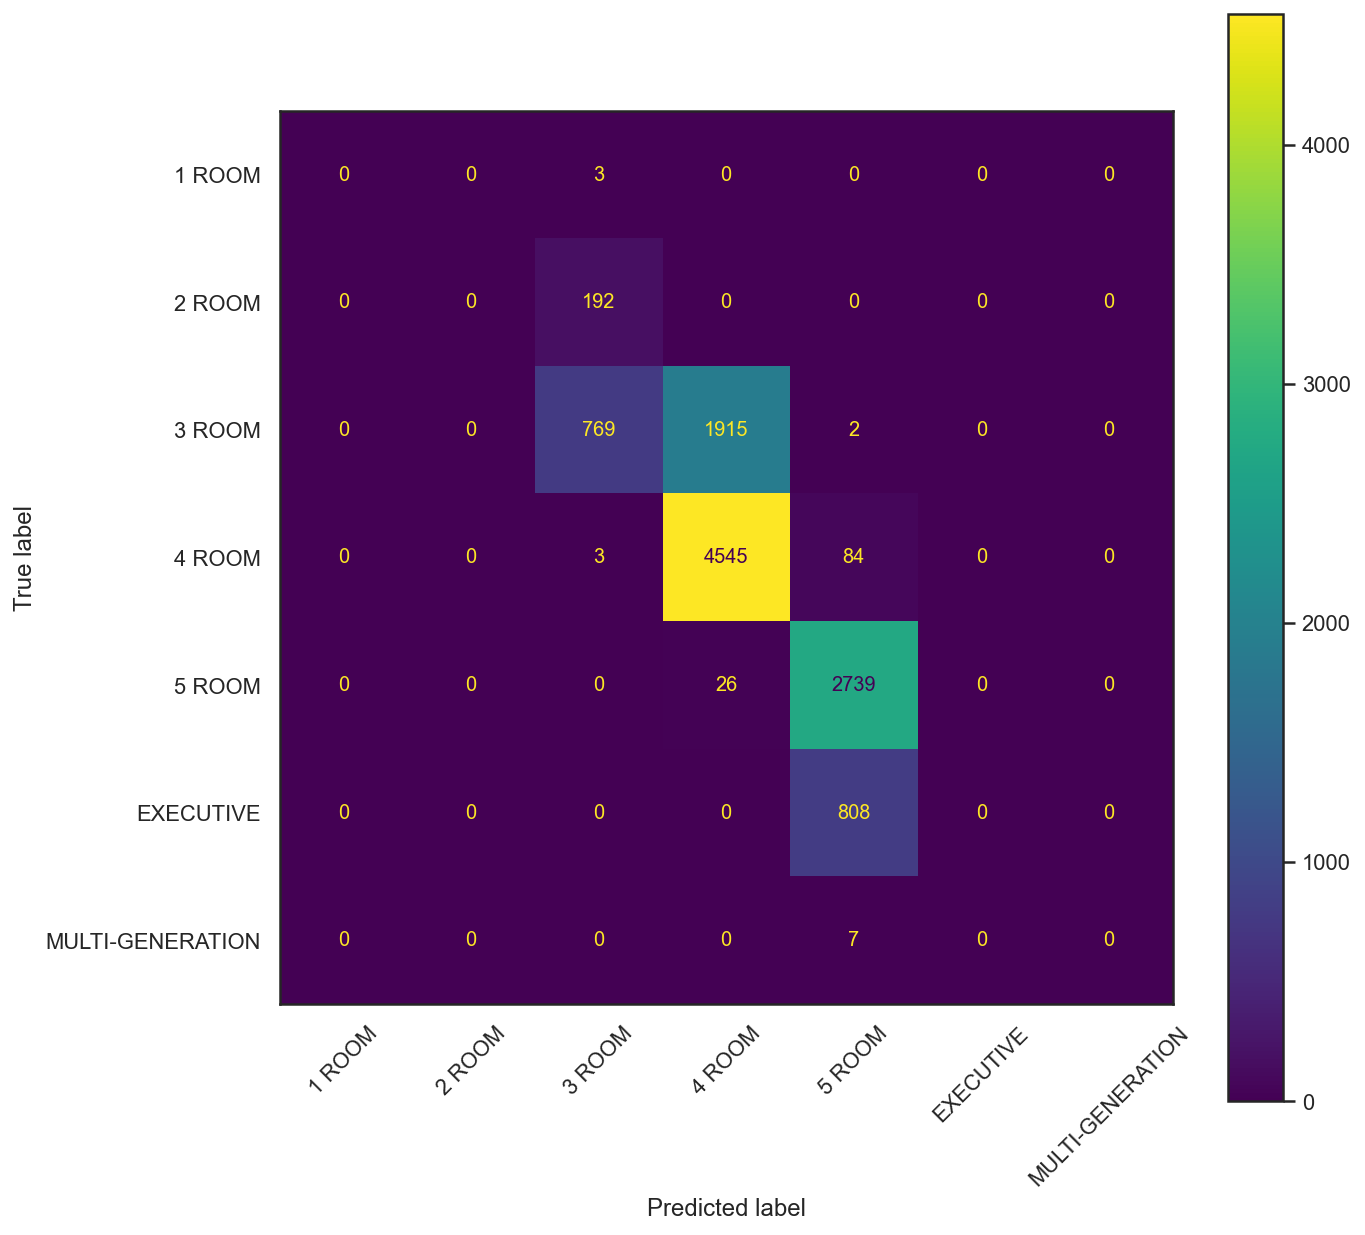

In [30]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(modelA, X_test, y_test, ax=ax, xticks_rotation = 45);

## AdaBoost (with Gaussian Navie Bayes)
Refer to the following links on for detail explanation on the implementation:

In [31]:
model = GaussianNB()
#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

GaussianNB()

In [32]:
#Use the trained model to predict the test data
y_pred = model.predict(X_test)
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr_gnb = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
f2 = f1_score(y_pred, y_test,average='macro')
f3 = f1_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('accuracy: ',asr_gnb)
print('f1-Score: ',f1)
print('precision: ',f2)
print('recall: ',f3)

[[   3    0    0    0    0    0    0]
 [   0  181    0    0    0    0    0]
 [   0   11 2593   51    0    0    0]
 [   0    0   91 4437  124    0    0]
 [   0    0    1  144 2543  147    0]
 [   0    0    1    0   98  655    4]
 [   0    0    0    0    0    6    3]]
accuracy:  0.9388803750112684
f1-Score:  0.9388803750112684
precision:  0.8595810098118273
recall:  0.9389182138282595


In [33]:
nb = GaussianNB()

model = AdaBoostClassifier(n_estimators=50,learning_rate=1, base_estimator=nb)
#model = BaggingClassifier(n_estimators=50, base_estimator=knn)


#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=GaussianNB(), learning_rate=1)

In [34]:
#Use the trained model to predict the test data
y_pred = model.predict(X_test)
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
asr_gnb2 = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
f2 = f1_score(y_pred, y_test,average='macro')
f3 = f1_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('asr: ',asr_gnb2)
print('f1: ',f1)
print('f2: ',f2)
print('f3: ',f3)

[[   3    0    0    0    0    0    0]
 [   0  182  110    0    0    0    0]
 [   0   10 2069   66    0    0    0]
 [   0    0  504 4562 1772   68    0]
 [   0    0    2    3  767   95    0]
 [   0    0    1    1  226  640    5]
 [   0    0    0    0    0    5    2]]
asr:  0.7414585774812945
f1:  0.7414585774812945
f2:  0.6955597832841305
f3:  0.7711125584223351


# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(max_depth = 2, n_estimators=100, random_state=424, criterion ='entropy')
clf = RandomForestClassifier(n_estimators=100, random_state=0, criterion ='entropy')

clf.fit(X_train,y_train)

# get predictions 
predictions = clf.predict(X_test)

# compare results
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}).sample(10)

conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix

array([[   3,    0,    0,    0,    0,    0,    0],
       [   0,  190,    2,    0,    0,    0,    0],
       [   0,    1, 2667,   16,    2,    0,    0],
       [   0,    0,    2, 4626,    4,    0,    0],
       [   0,    0,    0,    1, 2761,    3,    0],
       [   0,    0,    0,    0,    8,  800,    0],
       [   0,    0,    0,    0,    0,    0,    7]], dtype=int64)

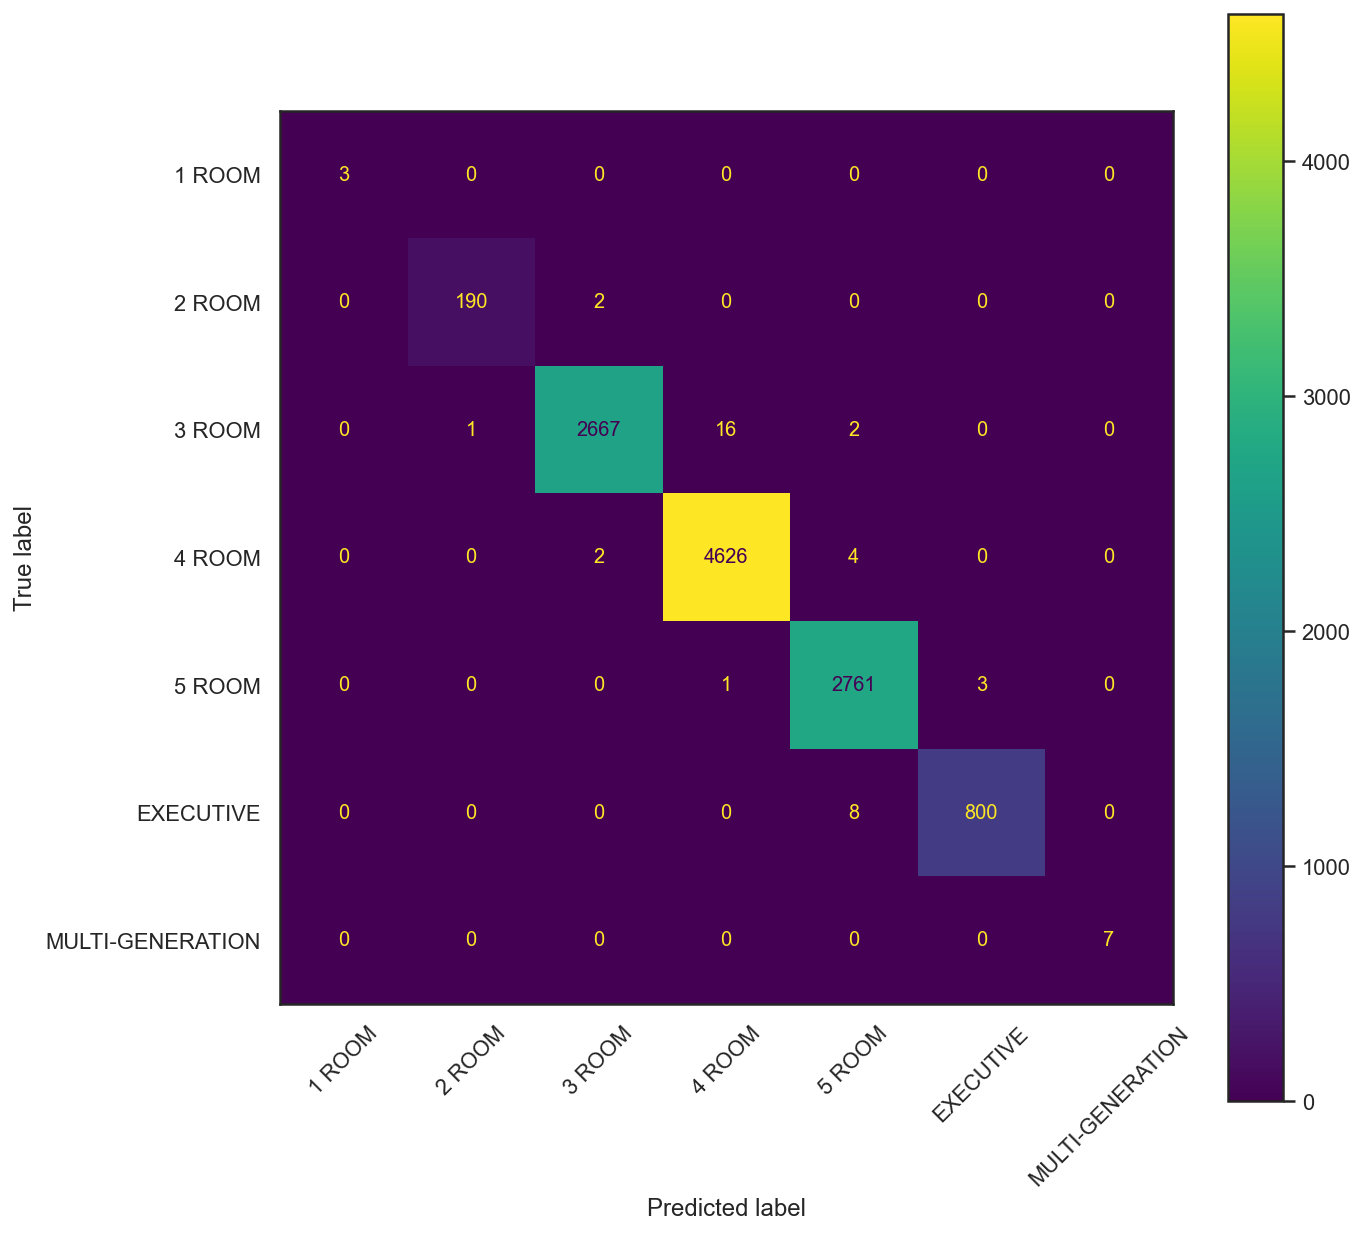

In [36]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(clf, X_test, y_test, ax=ax, xticks_rotation = 45);

In [37]:
# Find the accuracy and F1 score of the result
asr_rf = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test,average='micro')

# testing out differet form of accuracy.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
f2 = f1_score(y_pred, y_test,average='macro')
f3 = f1_score(y_pred, y_test,average='weighted')

#The best f1_score is 1 and the worst value is 0.

print('accuracy: ',asr_rf)
print('f1-Score: ',f1)
print('precision: ',f2)
print('recall: ',f3)

accuracy:  0.7414585774812945
f1-Score:  0.7414585774812945
precision:  0.6955597832841305
recall:  0.7711125584223351


In [38]:
visualized = [asr_dt,asr_knn,asr_bag,bag_knn,asr_knn,asr_ada,asr_gnb,asr_gnb2,asr_rf]

In [39]:
sum(visualized)/9

0.8368640884641967

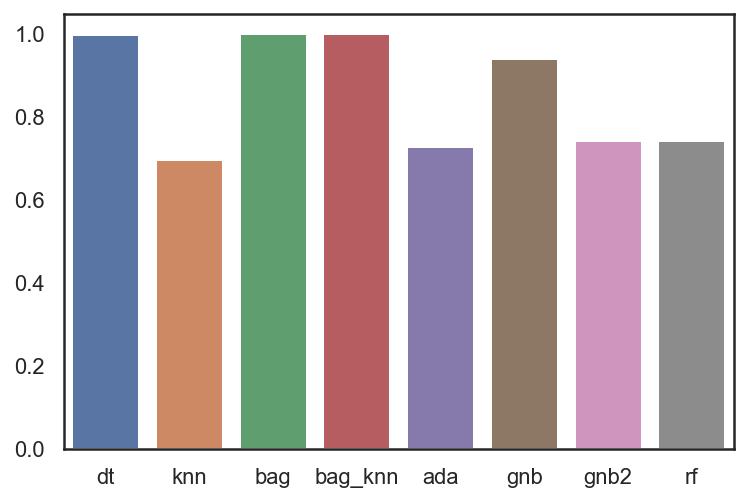

In [40]:
names = ['dt','knn','bag','bag_knn','knn','ada','gnb','gnb2','rf']

import seaborn as sns
tips = sns.load_dataset("tips")
ax = sns.barplot(x=names, y = visualized)